# DEEP LEARNING ALGORITHMS IN MACHINE LEARNING PROBLEMS

## Introduction to Deep Learning Models Inspired by Biological Neurons

Deep learning models are mathematical structures inspired by the way neurons operate in the human brain. Much like the biological neurons, signals received by an artificial neuron are summed linearly, with each signal contributing according to a specific weight. If there is consistent communication and interaction between two neurons, the connection between them strengthens, causing the signals to be more weighted, a principle borrowed from biological neural interactions.

In deep learning, signals are processed within the neuron, guided by an activation function. If the total incoming signals exceed a certain threshold, the neuron becomes active; if not, it remains inactive. This threshold is typically determined by the nature of the activation function—ReLU sets it at 0, sigmoid at 0.5, and tanh at 0, among others. This activation mechanism allows deep learning models to make decisions similarly to biological neurons.

Backpropagation is a key process in deep learning where, after error estimation, each neuron's contribution to the overall error is calculated, enabling weight adjustments. This is done iteratively, either for a predefined number of iterations or until the error falls below a certain threshold, allowing for optimal weights.

Once the loss function is calculated, the model seeks its minimum point through gradient descent. Derivatives are used to assess changes at a given point rather than the point's absolute value. If a small change at that point results in zero, the tangent's slope is zero, indicating a local minimum. This process is vital in training deep learning models to achieve accurate results.

It is also noteworthy that re-running deep learning models can produce varied results due to the random initialization of weights at the start, which can lead to different local minima. Activation functions, like sigmoid and hyperbolic tangent (tanh), add non-linearity to the model but can face the vanishing gradient issue, where learning slows down in regions where the function flattens. To counter this, the Rectified Linear Unit (ReLU) activation function is often employed, allowing for more efficient training.

In summary, deep learning models are meticulously designed to emulate biological processes, combining weighted signal processing, activation functions, backpropagation, and optimization techniques to deliver increasingly sophisticated and accurate predictions.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.simplefilter("ignore")

# Diabetes dataset (Linear Regression)

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
#print(data["DESCR"])

X = data["data"]
y = data["target"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# normalization is critical

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
X_train.shape

(353, 10)

To define the `input_shape` in a neural network, we need to specify information about the input layer. In this case, there are 10 variables, meaning each observation is represented as a vector with 10 elements. Therefore, we can set the `input_shape` as a tuple like `(10,)`, indicating that each instance has a dimensionality of 10. 

Alternatively, we can use `(X_train.shape[1],)`, where `X_train.shape[1]` dynamically captures the number of features based on the training dataset. This approach provides flexibility in case the feature count changes, making the model adaptable to different input structures.

In [5]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1],)))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
# output layer:
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])
mdl.fit(X_train, y_train, epochs=100, verbose = 0)

In [6]:
# test dataset performance: 

mdl.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2919.5691 - mape: 36.8187 


[2754.380126953125, 37.4848747253418]

In [7]:
# prediction

ypred = mdl.predict(X_test)
ypred[0:5]
# ...

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[153.90851],
       [179.7517 ],
       [149.70349],
       [306.11917],
       [ 92.26828]], dtype=float32)

# Breast Cancer (classification)

In [8]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data["data"]
y = data["target"]

# print(data["DESCR"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(455, 30)

Minimizing binary cross-entropy leads to maximizing accuracy in classification problems. When the prediction is 1 and the true value is also 1, the loss is 0, indicating a perfect match. However, if the prediction is 0 while the true value is 1, the loss approaches infinity, reflecting a significant error.

In other words, when the binary cross-entropy loss is minimized, the model's predictions align closely with the true values. Therefore, minimizing binary cross-entropy is essential for achieving accurate classifications.

In [10]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1],)))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
# output layer:
mdl.add(layers.Dense(1, activation = "sigmoid"))

mdl.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

mdl.fit(X_train, y_train, epochs=10, verbose=0)

In [11]:
mdl.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0678 


[0.05429065600037575, 0.9824561476707458]

In [12]:
ypred = mdl.predict(X_test)

# `ypred` is the output of the sigmoid function, which provides the prediction as a probability.
# It indicates the likelihood that the observation belongs to class 1.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Multiple Classification

The output layer should contain 3 neurons since predictions are being made for 3 different plant types. Each neuron will be specialized for one class, with the first neuron focusing on predicting class 0. 

The softmax function is used for these neurons. This function ensures that each of the three prediction outputs is greater than zero and that the probabilities sum up to 1. This way, each output represents the probability of the observation belonging to one of the three classes.

In [13]:
from sklearn.datasets import load_iris

data = load_breast_cancer()

X = data["data"]
y = data["target"]

# print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1],)))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(64, activation = "relu"))
# output layer:
mdl.add(layers.Dense(3, activation = "softmax"))

# softmax: all greater than 0 and sum equals 1
mdl.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

mdl.fit(X_train, y_train, epochs=50, verbose=0)

# results is vector with 3 elements
# assignments are done into highest probability class via argmax

In [14]:
ypred = mdl.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x157fad6c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [15]:
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [16]:
mdl.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,259 (145.55 KB)

 Trainable params: 12,419 (48.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,840 (97.04 KB)

In deep learning, regularization is performed automatically by keeping the weights small. However, there is still a risk of overfitting. When models are trained excessively, they begin to memorize the data instead of learning the relationship between the input and output. Therefore, we need to decide how many iterations to perform and how long to train the model.

# Diabetes (Linear Regression) - Overfit issue

Lets build more complex data

In [17]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

X = data["data"]
y = data["target"]

# print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1],)))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))

mdl.add(layers.Dense(1, activation = "linear"))


mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])
history = mdl.fit(X_train, y_train, epochs=200, verbose=0)

check overfitting:

In [18]:
mdl.evaluate(X_train, y_train)
mdl.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61.6229 - mape: 4.9680 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3917.7227 - mape: 40.9384


[4153.12109375, 43.629302978515625]

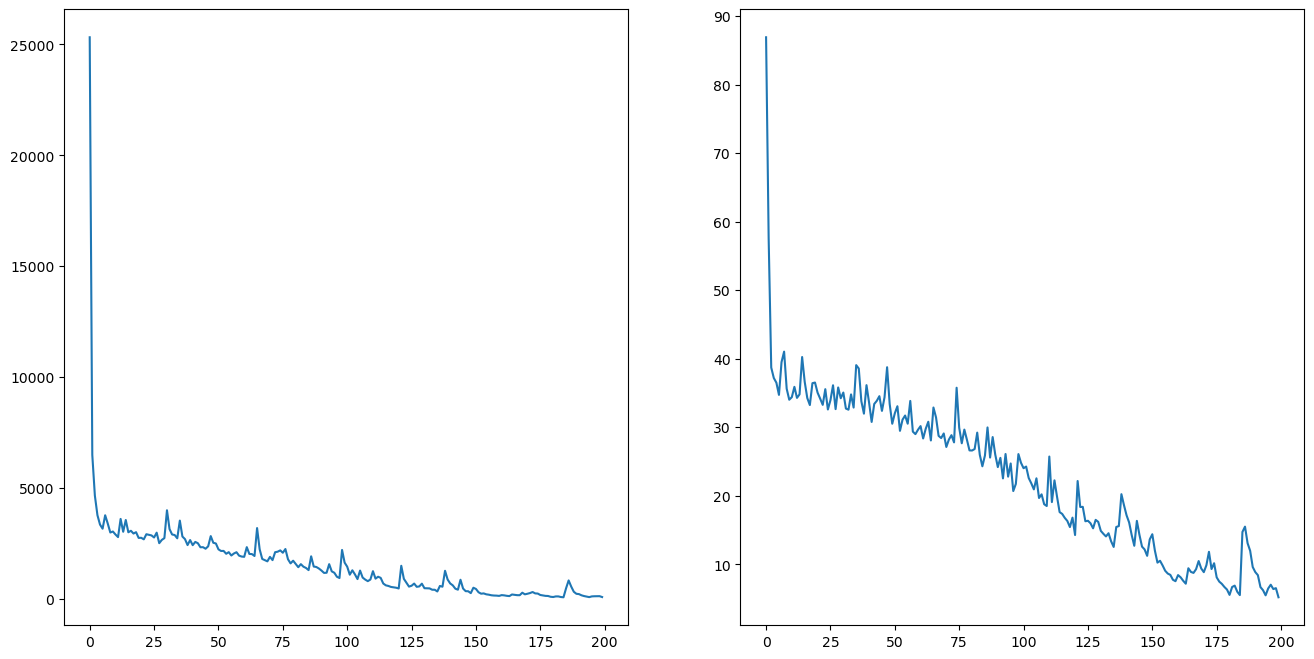

In [19]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])

plt.subplot(1,2,2)
plt.plot(history.history["mape"])

Lets zoom in

(0.0, 50.0)

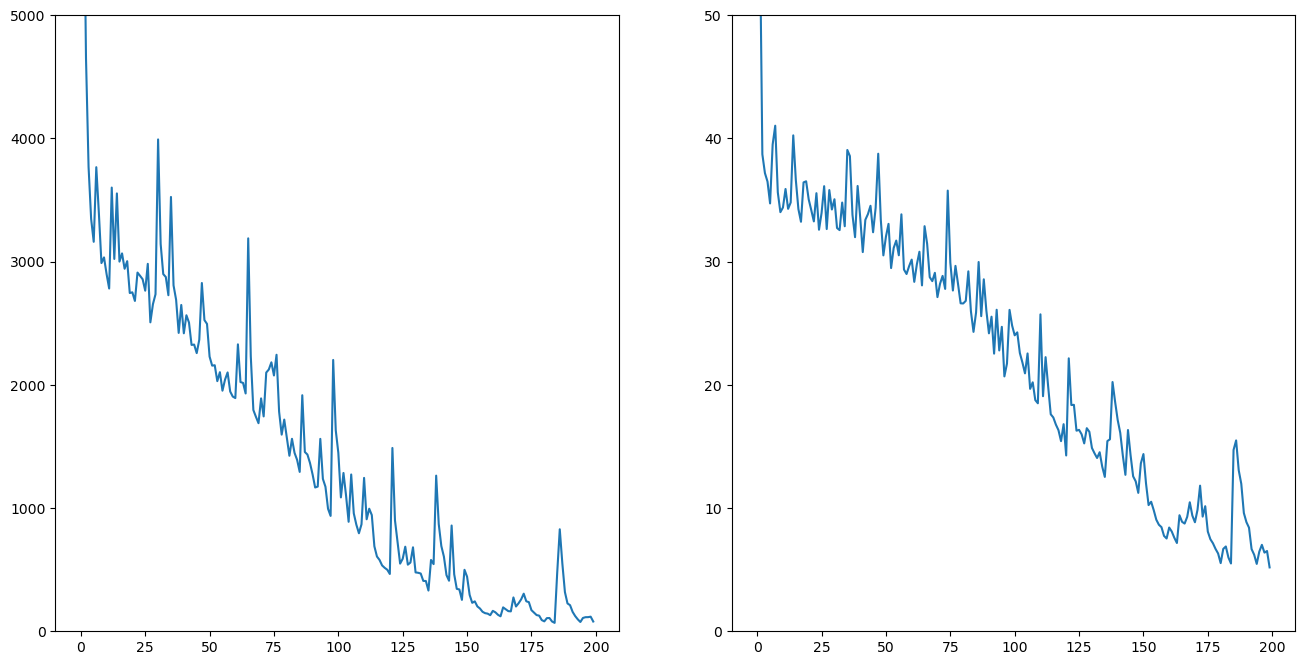

In [20]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])

plt.ylim([0,5000])

plt.subplot(1,2,2)
plt.plot(history.history["mape"])
plt.ylim([0,50])

Let’s split the training data into training and validation sets. During each iteration, we can measure the model’s performance on the validation set. This can be achieved by adding the validation_split parameter to the fit function, where we specify a percentage for the split.

In [21]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

X = data["data"]
y = data["target"]

# print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1],)))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))

mdl.add(layers.Dense(1, activation = "linear"))


mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])
history = mdl.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 155.2618 - mape: 3.7402
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4713.2080 - mape: 41.9135


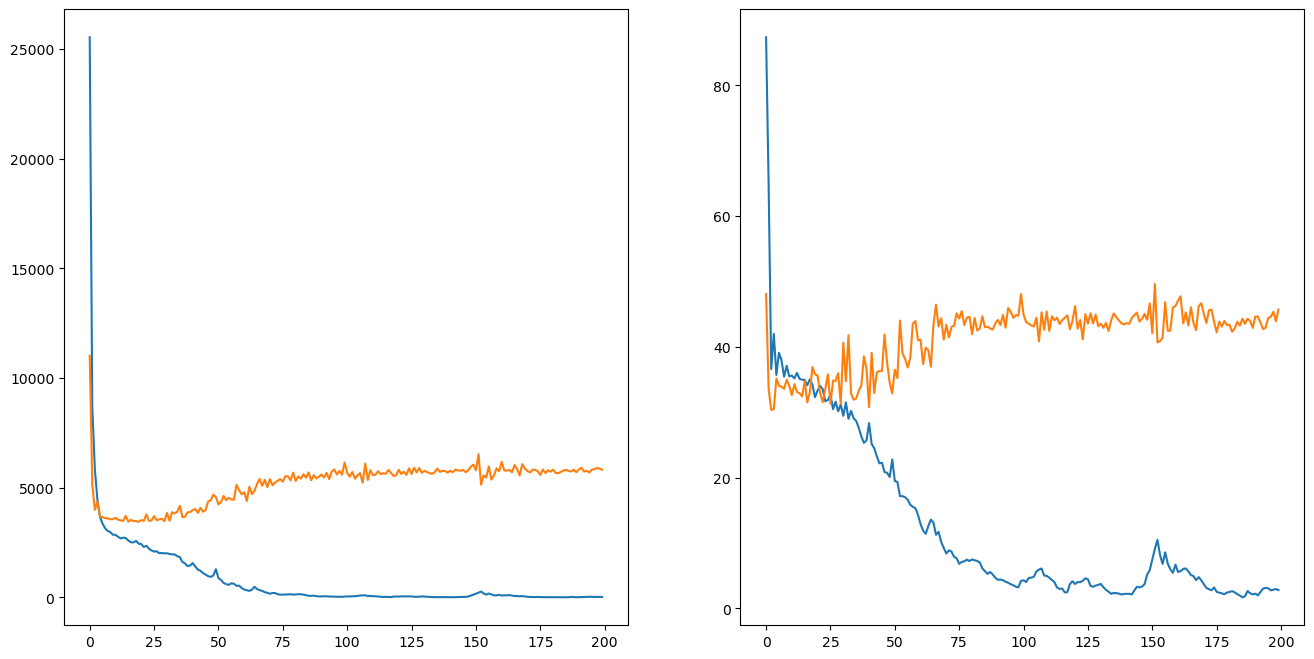

In [22]:
mdl.evaluate(X_train, y_train)
mdl.evaluate(X_test, y_test)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.subplot(1,2,2)
plt.plot(history.history["mape"])
plt.plot(history.history["val_mape"])

plt.show()

We can identify overtraining from these graphs. So, what can we do to address it? One solution is to apply early stopping. This involves monitoring the validation data during each iteration and stopping the training when the validation performance starts to deteriorate. However, instead of stopping immediately, we allow the training to continue for a specified number of iterations (a grace period) to see if the performance improves again. If there is no improvement after this period, training is stopped.

This is implemented using the patience parameter, where we specify the number of iterations to wait. In the fit function, we include it as callbacks = [early_stop], where early_stop is configured with the desired patience level.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2475.0752 - mape: 34.9981
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2918.7827 - mape: 36.5051


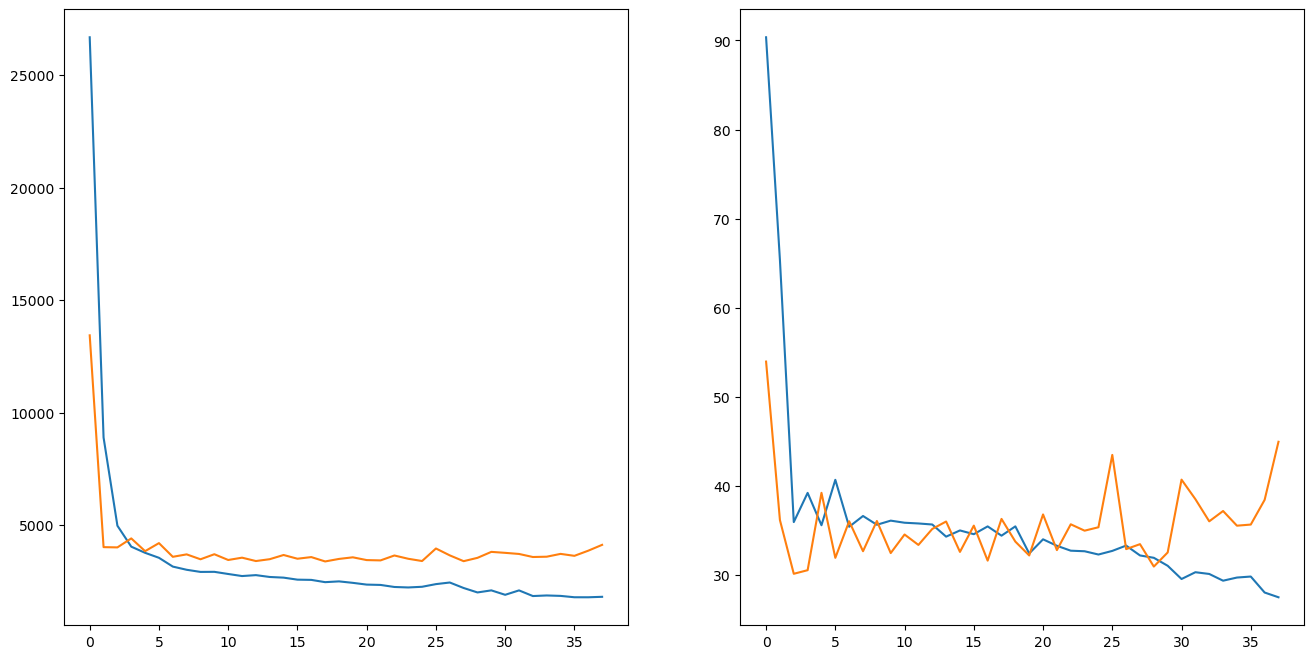

In [23]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

X = data["data"]
y = data["target"]

# print(data["DESCR"])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1],)))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))
mdl.add(layers.Dense(512, activation = "relu"))

mdl.add(layers.Dense(1, activation = "linear"))

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)


mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])
history = mdl.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.1, callbacks=[early_stop])

mdl.evaluate(X_train, y_train)
mdl.evaluate(X_test, y_test)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.subplot(1,2,2)
plt.plot(history.history["mape"])
plt.plot(history.history["val_mape"])

plt.show()